**Pre-train**
* VGG-16
* ResNet50
* Inceptionv3
* EfficientNet
* MobileNet

**Optimizer**
* class Adam 
* class RMSprop  
* class SGD 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import

In [ ]:
from numpy import expand_dims
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input

import tensorflow as tf

from PIL import Image 
from PIL import ImageFilter 

from scipy import ndimage
from skimage.transform import resize


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
%matplotlib inline

In [ ]:
from os import listdir

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model, load_model
from keras.layers import Dense,GlobalAveragePooling2D
%matplotlib inline
import tensorflow as tf
import tensorflow

import time

#Load Dataset



In [ ]:
TRAIN_DATA_PATH = '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a-ori/'
path_x_train = '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_train.npy'
path_y_train = '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_train.npy'
path_x_test  = '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_test.npy'
path_y_test  = '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_test.npy'
path_x_val   = '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/x_val.npy'
path_y_val   = '/content/drive/MyDrive/All Dataset/Dataset/Github/Dataset_09-a/y_val.npy'

NUM_OF_LETTERS =10
IMAGE_SIZE = 224 
NUM_OF_CHANNELS = 3 

train_ratio = 0.60
test_ratio = 0.20
val_ratio =0.20
LABELS = ['zero','one','two','three','four','five','six','seven','eight','nine']

In [ ]:

def Load_dataset(TRAIN_DATA_PATH):
  x_train = np.load(path_x_train)
  y_train = np.load(path_y_train)
  x_test  = np.load(path_x_test)
  y_test  = np.load(path_y_test)
  x_val   = np.load(path_x_val)
  y_val   = np.load(path_y_val)
  x_train,  x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=1 - train_ratio,random_state=42)
  x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + val_ratio),random_state=42) 
  
  return x_train,  x_test, x_val, y_train, y_test ,y_val

#main
train_images, test_images, val_images, train_labels, test_labels,val_labels = Load_dataset(TRAIN_DATA_PATH)

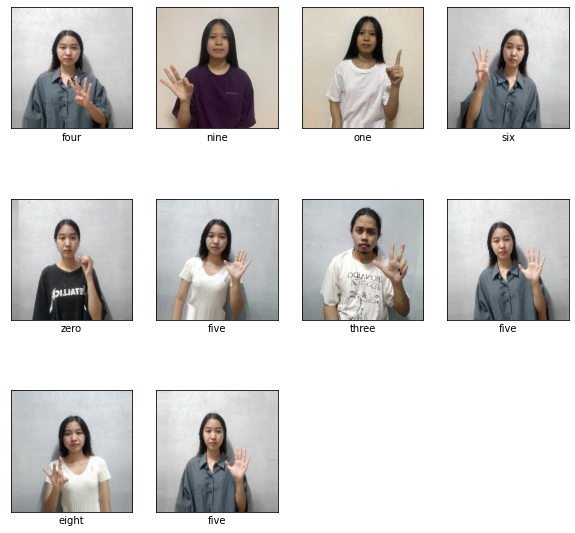

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].astype('int'))
    plt.xlabel(LABELS[train_labels[i].astype('int')])
plt.show()

In [ ]:
print('train set : ',train_images.shape)
print('test set : ',test_images.shape)
print('val set : ',val_images.shape)

train set :  (7504, 224, 224, 3)
test set :  (2502, 224, 224, 3)
val set :  (2501, 224, 224, 3)



#Model MobileNetV3

##Augmentation

**Searching for MobileNetV3**

https://arxiv.org/abs/1905.02244

We present the next generation of MobileNets based on a combination of complementary search techniques as well as a novel architecture design. MobileNetV3 is tuned to mobile phone CPUs through a combination of hardware-aware network architecture search (NAS) complemented by the NetAdapt algorithm and then subsequently improved through novel architecture advances. This paper starts the exploration of how automated search algorithms and network design can work together to harness complementary approaches improving the overall state of the art. Through this process we create two new MobileNet models for release: MobileNetV3-Large and MobileNetV3-Small which are targeted for high and low resource use cases. These models are then adapted and applied to the tasks of object detection and semantic segmentation. For the task of semantic segmentation (or any dense pixel prediction), we propose a new efficient segmentation decoder Lite Reduced Atrous Spatial Pyramid Pooling (LR-ASPP). We achieve new state of the art results for mobile classification, detection and segmentation. MobileNetV3-Large is 3.2\% more accurate on ImageNet classification while reducing latency by 15\% compared to MobileNetV2. MobileNetV3-Small is 4.6\% more accurate while reducing latency by 5\% compared to MobileNetV2. MobileNetV3-Large detection is 25\% faster at roughly the same accuracy as MobileNetV2 on COCO detection. MobileNetV3-Large LR-ASPP is 30\% faster than MobileNetV2 R-ASPP at similar accuracy for Cityscapes segmentation.

In [ ]:
conv_base_MobileNet =tf.keras.applications.MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

6709248/6698480 [==============================] - 0s 0us/step


In [ ]:
for layer in conv_base_MobileNet.layers:
    layer.trainable = False

In [ ]:
for i, layer in enumerate(conv_base_MobileNet.layers):
  print(i, layer.name, "-", layer.trainable)

0 input_1 - False
1 rescaling - False
2 Conv - False
3 Conv/BatchNorm - False
4 tf.__operators__.add - False
5 re_lu - False
6 tf.math.multiply - False
7 multiply - False
8 expanded_conv/depthwise/pad - False
9 expanded_conv/depthwise - False
10 expanded_conv/depthwise/BatchNorm - False
11 re_lu_1 - False
12 expanded_conv/squeeze_excite/AvgPool - False
13 expanded_conv/squeeze_excite/Conv - False
14 expanded_conv/squeeze_excite/Relu - False
15 expanded_conv/squeeze_excite/Conv_1 - False
16 tf.__operators__.add_1 - False
17 re_lu_2 - False
18 tf.math.multiply_1 - False
19 expanded_conv/squeeze_excite/Mul - False
20 expanded_conv/project - False
21 expanded_conv/project/BatchNorm - False
22 expanded_conv_1/expand - False
23 expanded_conv_1/expand/BatchNorm - False
24 re_lu_3 - False
25 expanded_conv_1/depthwise/pad - False
26 expanded_conv_1/depthwise - False
27 expanded_conv_1/depthwise/BatchNorm - False
28 re_lu_4 - False
29 expanded_conv_1/project - False
30 expanded_conv_1/project/Ba

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [ ]:
modelMobileNetV3_small_09_a = models.Sequential()
modelMobileNetV3_small_09_a.add(conv_base_MobileNet)
modelMobileNetV3_small_09_a.add(layers.Flatten())
modelMobileNetV3_small_09_a.add(layers.BatchNormalization())
modelMobileNetV3_small_09_a.add(layers.Dense(256, activation='relu'))

modelMobileNetV3_small_09_a.add(layers.Dropout(0.5))
modelMobileNetV3_small_09_a.add(layers.BatchNormalization())

modelMobileNetV3_small_09_a.add(layers.Dense(128, activation='relu'))
modelMobileNetV3_small_09_a.add(layers.Dropout(0.5))
modelMobileNetV3_small_09_a.add(layers.BatchNormalization())

modelMobileNetV3_small_09_a.add(layers.Dense(64, activation='relu'))
modelMobileNetV3_small_09_a.add(layers.Dropout(0.5))
modelMobileNetV3_small_09_a.add(layers.BatchNormalization())
modelMobileNetV3_small_09_a.add(layers.Dense(10, activation='softmax'))
modelMobileNetV3_small_09_a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MobilenetV3small (Functional (None, 1, 1, 1024)        1529968   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

###rmsProp

In [ ]:
opt_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=2e-5)

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping( monitor='val_loss', min_delta=0,patience=3,verbose=0, mode='auto')

In [ ]:
early_stop = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/My models/MobileNetV3_small_09_rmsprop_.h5')

In [ ]:
modelMobileNetV3_small_09_a.compile(optimizer= opt_rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
history_MobileNetV3_small_09_a = modelMobileNetV3_small_09_a.fit(train_images, train_labels,batch_size=64,epochs=500,validation_data=(val_images, val_labels),callbacks=[early_stop,check_point])
end = time.time()

Epoch 1/500
118/118 [==============================] - 30s 215ms/step - loss: 2.9200 - accuracy: 0.1069 - val_loss: 2.3355 - val_accuracy: 0.1040


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/500
118/118 [==============================] - 22s 186ms/step - loss: 2.8886 - accuracy: 0.1045 - val_loss: 2.3426 - val_accuracy: 0.1204
Epoch 3/500
118/118 [==============================] - 24s 200ms/step - loss: 2.8652 - accuracy: 0.1121 - val_loss: 2.3248 - val_accuracy: 0.1351
Epoch 4/500
118/118 [==============================] - 22s 191ms/step - loss: 2.8652 - accuracy: 0.1134 - val_loss: 2.3044 - val_accuracy: 0.1463
Epoch 5/500
118/118 [==============================] - 23s 193ms/step - loss: 2.8583 - accuracy: 0.1162 - val_loss: 2.2828 - val_accuracy: 0.1563
Epoch 6/500
118/118 [==============================] - 23s 192ms/step - loss: 2.8141 - accuracy: 0.1154 - val_loss: 2.2638 - val_accuracy: 0.1679
Epoch 7/500
118/118 [==============================] - 23s 193ms/step - loss: 2.7916 - accuracy: 0.1167 - val_loss: 2.2447 - val_accuracy: 0.1795
Epoch 8/500
118/118 [==============================] - 22s 191ms/step - loss: 2.7697 - accuracy: 0.1235 - val_loss: 2.2275 -

In [ ]:
test_loss, test_acc=modelMobileNetV3_small_09_a.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

79/79 [==============================] - 7s 80ms/step - loss: 0.3572 - accuracy: 0.8725
test_acc: 0.8725019693374634


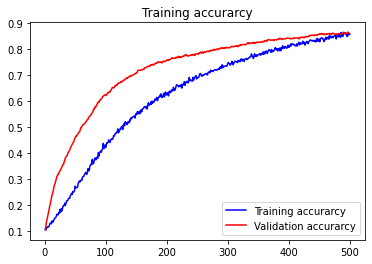

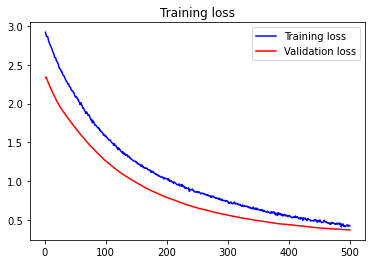

In [ ]:
acc = history_MobileNetV3_small_09_a.history['accuracy']
val_acc = history_MobileNetV3_small_09_a.history['val_accuracy']
loss = history_MobileNetV3_small_09_a.history['loss']
val_loss =history_MobileNetV3_small_09_a.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
modelMobileNetV3_small_09_a.save('/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/My models/MobileNetV3_small_09_rmsprop_.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


#Model ResNet50

##with out augmentation

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
conv_base_ResNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224, 3))

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [ ]:
#In this case, we ‘freeze’ all layers except for the last block of the ResNet50. 
for layer in conv_base_ResNet50.layers[:143]:
  layer.trainable = False

In [ ]:
for i, layer in enumerate(conv_base_ResNet50.layers):
  print(i, layer.name, "-", layer.trainable)

0 input_1 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

In [ ]:
modelResNet50_09_wa = models.Sequential()
modelResNet50_09_wa.add(conv_base_ResNet50)
modelResNet50_09_wa.add(layers.Flatten())
modelResNet50_09_wa.add(layers.BatchNormalization())
modelResNet50_09_wa.add(layers.Dense(256, activation='relu'))

modelResNet50_09_wa.add(layers.Dropout(0.5))
modelResNet50_09_wa.add(layers.BatchNormalization())

modelResNet50_09_wa.add(layers.Dense(128, activation='relu'))
modelResNet50_09_wa.add(layers.Dropout(0.5))
modelResNet50_09_wa.add(layers.BatchNormalization())

modelResNet50_09_wa.add(layers.Dense(64, activation='relu'))
modelResNet50_09_wa.add(layers.Dropout(0.5))
modelResNet50_09_wa.add(layers.BatchNormalization())
modelResNet50_09_wa.add(layers.Dense(10, activation='softmax'))
modelResNet50_09_wa.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100352)            401408    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

###rmsProp

In [ ]:
opt_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=2e-5)

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping( monitor='val_loss', min_delta=0,patience=3,verbose=0, mode='auto')

In [ ]:
early_stop = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/My models/ResNet_09_wa_rmsprop_2.h5')

In [ ]:
modelResNet50_09_wa.compile(optimizer= opt_rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
history_ResNet_09_wa_rmsprop = modelResNet50_09_wa.fit(train_images, train_labels,batch_size=64,epochs=500,validation_data=(val_images, val_labels),callbacks=[early_stop,check_point])
end = time.time()

Epoch 1/500
12/12 [==============================] - 32s 2s/step - loss: 2.8625 - accuracy: 0.1014 - val_loss: 2.6220 - val_accuracy: 0.0958


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/500
12/12 [==============================] - 24s 2s/step - loss: 2.7960 - accuracy: 0.1139 - val_loss: 2.4496 - val_accuracy: 0.1417
Epoch 3/500
12/12 [==============================] - 25s 2s/step - loss: 2.7305 - accuracy: 0.1250 - val_loss: 2.3009 - val_accuracy: 0.1583
Epoch 4/500
12/12 [==============================] - 25s 2s/step - loss: 2.6459 - accuracy: 0.1694 - val_loss: 2.2234 - val_accuracy: 0.2000
Epoch 5/500
12/12 [==============================] - 24s 2s/step - loss: 2.5409 - accuracy: 0.1972 - val_loss: 2.1944 - val_accuracy: 0.2250
Epoch 6/500
12/12 [==============================] - 24s 2s/step - loss: 2.5820 - accuracy: 0.1653 - val_loss: 2.1575 - val_accuracy: 0.2458
Epoch 7/500
12/12 [==============================] - 24s 2s/step - loss: 2.5202 - accuracy: 0.1639 - val_loss: 2.1471 - val_accuracy: 0.2625
Epoch 8/500
12/12 [==============================] - 25s 2s/step - loss: 2.4311 - accuracy: 0.2097 - val_loss: 2.1177 - val_accuracy: 0.2708
Epoch 9/500
1

In [ ]:
test_loss, test_acc=modelResNet50_09_wa.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

8/8 [==============================] - 4s 490ms/step - loss: 1.4915 - accuracy: 0.5750
test_acc: 0.574999988079071


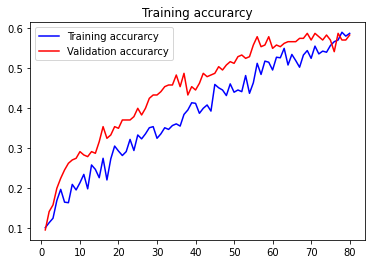

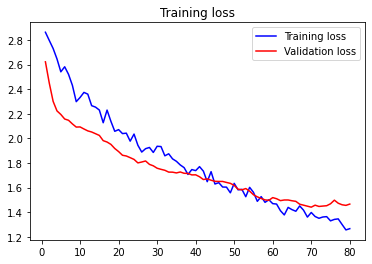

In [ ]:
acc = history_ResNet_09_wa_rmsprop.history['accuracy']
val_acc = history_ResNet_09_wa_rmsprop.history['val_accuracy']
loss = history_ResNet_09_wa_rmsprop.history['loss']
val_loss =history_ResNet_09_wa_rmsprop.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
# load Model
from keras.models import load_model
model_ResNet_09_wa_rmsprop_2 = load_model('/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/My models/ResNet_09_wa_rmsprop_2.h5')

In [ ]:
model_ResNet_09_wa_rmsprop_2.summary()

###SGD

In [ ]:
opt_sgd = tf.keras.optimizers.SGD(learning_rate=2e-5)

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping( monitor='val_loss', min_delta=0,patience=3,verbose=0, mode='auto')

In [ ]:
early_stop = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/My models/ResNet_09_wa_sgd.h5')

In [ ]:
modelResNet50_09_wa.compile(optimizer= opt_sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
history_ResNet_09_wa_sgd = modelResNet50_09_wa.fit(train_images, train_labels,batch_size=64,epochs=500,validation_data=(val_images, val_labels),callbacks=[early_stop,check_point])
end = time.time()

Epoch 1/500
12/12 [==============================] - 24s 2s/step - loss: 3.0665 - accuracy: 0.1042 - val_loss: 2.4564 - val_accuracy: 0.1208


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/500
12/12 [==============================] - 19s 2s/step - loss: 3.0782 - accuracy: 0.0958 - val_loss: 2.3985 - val_accuracy: 0.1208
Epoch 3/500
12/12 [==============================] - 19s 2s/step - loss: 2.8814 - accuracy: 0.1292 - val_loss: 2.3725 - val_accuracy: 0.1000
Epoch 4/500
12/12 [==============================] - 18s 2s/step - loss: 3.0515 - accuracy: 0.0931 - val_loss: 2.3583 - val_accuracy: 0.1042
Epoch 5/500
12/12 [==============================] - 19s 2s/step - loss: 2.9678 - accuracy: 0.0861 - val_loss: 2.3467 - val_accuracy: 0.1250
Epoch 6/500
12/12 [==============================] - 19s 2s/step - loss: 2.9341 - accuracy: 0.0903 - val_loss: 2.3448 - val_accuracy: 0.1333
Epoch 7/500
12/12 [==============================] - 19s 2s/step - loss: 2.9384 - accuracy: 0.1083 - val_loss: 2.3433 - val_accuracy: 0.1333
Epoch 8/500
12/12 [==============================] - 19s 2s/step - loss: 3.0252 - accuracy: 0.1083 - val_loss: 2.3450 - val_accuracy: 0.1250
Epoch 9/500
1

In [ ]:
test_loss, test_acc=modelResNet50_09_wa.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

8/8 [==============================] - 3s 402ms/step - loss: 2.2796 - accuracy: 0.1542
test_acc: 0.15416666865348816


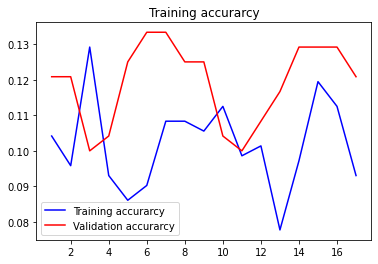

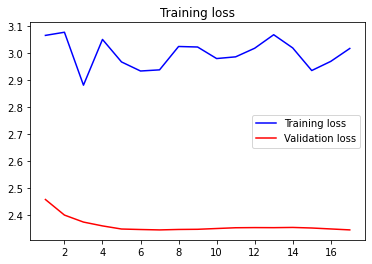

In [ ]:
acc = history_ResNet_09_wa_sgd.history['accuracy']
val_acc = history_ResNet_09_wa_sgd.history['val_accuracy']
loss = history_ResNet_09_wa_sgd.history['loss']
val_loss =history_ResNet_09_wa_sgd.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
# load Model
from keras.models import load_model
model_ResNet_09_wa_rmsprop_2 = load_model('/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/My models/ResNet_09_wa_rmsprop_2.h5')

In [ ]:
model_ResNet_09_wa_rmsprop_2.summary()

###Adam

In [ ]:
opt_adam = tf.keras.optimizers.Adam(learning_rate=2e-5)

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping( monitor='val_loss', min_delta=0,patience=3,verbose=0, mode='auto')

In [ ]:
early_stop = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/All Dataset/Dataset/Github/ThSL-Model/My models/ResNet_09_wa_adam.h5')

In [ ]:
modelResNet50_09_wa.compile(optimizer= opt_adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
history_ResNet_09_wa_adam = modelResNet50_09_wa.fit(train_images, train_labels,batch_size=64,epochs=500,validation_data=(val_images, val_labels),callbacks=[early_stop,check_point])
end = time.time()

Epoch 1/500
12/12 [==============================] - 18s 2s/step - loss: 2.6491 - accuracy: 0.1403 - val_loss: 2.2570 - val_accuracy: 0.1833


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/500
12/12 [==============================] - 19s 2s/step - loss: 2.6726 - accuracy: 0.1444 - val_loss: 2.1895 - val_accuracy: 0.2083
Epoch 3/500
12/12 [==============================] - 19s 2s/step - loss: 2.6503 - accuracy: 0.1556 - val_loss: 2.1471 - val_accuracy: 0.2125
Epoch 4/500
12/12 [==============================] - 20s 2s/step - loss: 2.4884 - accuracy: 0.1764 - val_loss: 2.1060 - val_accuracy: 0.2583
Epoch 5/500
12/12 [==============================] - 21s 2s/step - loss: 2.4530 - accuracy: 0.1944 - val_loss: 2.0844 - val_accuracy: 0.2583
Epoch 6/500
12/12 [==============================] - 21s 2s/step - loss: 2.4609 - accuracy: 0.2083 - val_loss: 2.0606 - val_accuracy: 0.2708
Epoch 7/500
12/12 [==============================] - 21s 2s/step - loss: 2.4206 - accuracy: 0.1861 - val_loss: 2.0325 - val_accuracy: 0.2833
Epoch 8/500
12/12 [==============================] - 20s 2s/step - loss: 2.4093 - accuracy: 0.1972 - val_loss: 2.0270 - val_accuracy: 0.2708
Epoch 9/500
1

In [ ]:
test_loss, test_acc=modelResNet50_09_wa.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

8/8 [==============================] - 3s 418ms/step - loss: 1.3559 - accuracy: 0.6125
test_acc: 0.612500011920929


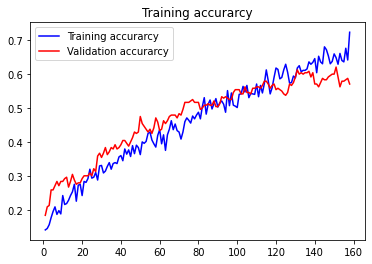

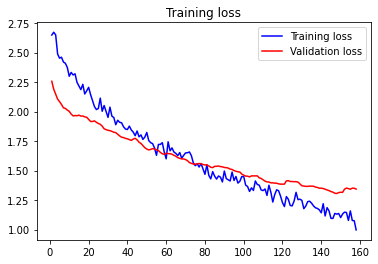

In [ ]:
acc = history_ResNet_09_wa_adam.history['accuracy']
val_acc = history_ResNet_09_wa_adam.history['val_accuracy']
loss = history_ResNet_09_wa_adam.history['loss']
val_loss =history_ResNet_09_wa_adam.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()
plt.show()

##Augmentation

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
conv_base_ResNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224, 3))

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [ ]:
#In this case, we ‘freeze’ all layers except for the last block of the ResNet50. 
for layer in conv_base_ResNet50.layers[:143]:
  layer.trainable = False

In [ ]:
for i, layer in enumerate(conv_base_ResNet50.layers):
  print(i, layer.name, "-", layer.trainable)

0 input_1 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

In [ ]:
modelResNet50_09_a = models.Sequential()
modelResNet50_09_a.add(conv_base_ResNet50)
modelResNet50_09_a.add(layers.Flatten())
modelResNet50_09_a.add(layers.BatchNormalization())
modelResNet50_09_a.add(layers.Dense(256, activation='relu'))

modelResNet50_09_a.add(layers.Dropout(0.5))
modelResNet50_09_a.add(layers.BatchNormalization())

modelResNet50_09_a.add(layers.Dense(128, activation='relu'))
modelResNet50_09_a.add(layers.Dropout(0.5))
modelResNet50_09_a.add(layers.BatchNormalization())

modelResNet50_09_a.add(layers.Dense(64, activation='relu'))
modelResNet50_09_a.add(layers.Dropout(0.5))
modelResNet50_09_a.add(layers.BatchNormalization())
modelResNet50_09_a.add(layers.Dense(10, activation='softmax'))
modelResNet50_09_a.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100352)            401408    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

###rmsProp

In [ ]:
opt_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=2e-5)

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping( monitor='val_loss', min_delta=0,patience=3,verbose=0, mode='auto')

In [ ]:
early_stop = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/All Dataset/Dataset/Github/My models/ResNet_09_a_rmsprop.h5')

In [ ]:
modelResNet50_09_a.compile(optimizer= opt_rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
history_ResNet_09_a_rmsprop = modelResNet50_09_a.fit(train_images, train_labels,batch_size=64,epochs=500,validation_data=(val_images, val_labels),callbacks=[early_stop,check_point])
end = time.time()

Epoch 1/500
118/118 [==============================] - 193s 2s/step - loss: 2.9227 - accuracy: 0.1163 - val_loss: 2.1452 - val_accuracy: 0.2335


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/500
118/118 [==============================] - 190s 2s/step - loss: 2.7066 - accuracy: 0.1453 - val_loss: 1.9967 - val_accuracy: 0.3279
Epoch 3/500
118/118 [==============================] - 191s 2s/step - loss: 2.5570 - accuracy: 0.1700 - val_loss: 1.9225 - val_accuracy: 0.3467
Epoch 4/500
118/118 [==============================] - 191s 2s/step - loss: 2.4173 - accuracy: 0.2058 - val_loss: 1.7816 - val_accuracy: 0.4078
Epoch 5/500
118/118 [==============================] - 189s 2s/step - loss: 2.3077 - accuracy: 0.2263 - val_loss: 1.6937 - val_accuracy: 0.4474
Epoch 6/500
118/118 [==============================] - 193s 2s/step - loss: 2.1696 - accuracy: 0.2615 - val_loss: 1.6099 - val_accuracy: 0.4878
Epoch 7/500
118/118 [==============================] - 192s 2s/step - loss: 2.0376 - accuracy: 0.3053 - val_loss: 1.5065 - val_accuracy: 0.5490
Epoch 8/500
118/118 [==============================] - 192s 2s/step - loss: 1.9368 - accuracy: 0.3317 - val_loss: 1.3947 - val_accuracy:

In [ ]:
test_loss, test_acc=modelResNet50_09_a.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

79/79 [==============================] - 43s 538ms/step - loss: 0.0895 - accuracy: 0.9796
test_acc: 0.9796162843704224


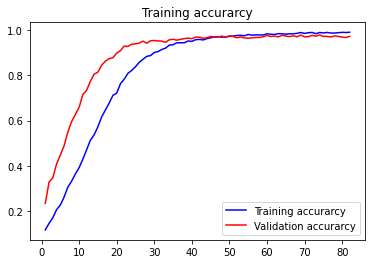

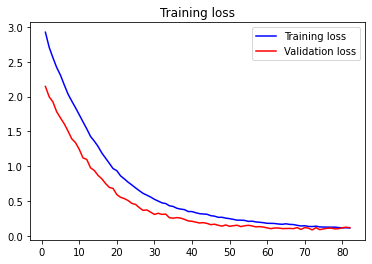

In [ ]:
acc = history_ResNet_09_a_rmsprop.history['accuracy']
val_acc = history_ResNet_09_a_rmsprop.history['val_accuracy']
loss = history_ResNet_09_a_rmsprop.history['loss']
val_loss =history_ResNet_09_a_rmsprop.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training loss')
plt.legend()
plt.show()

#Load model

In [ ]:
# load Model
from keras.models import load_model

In [ ]:
model_MobileNetV3_small_09_a_rmsprop = load_model('/content/drive/MyDrive/All Dataset/Dataset/Github/My models/MobileNetV3_small_09_rmsprop_.h5')

In [ ]:
model_MobileNetV3_small_09_a_rmsprop.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
MobilenetV3small (Functional (None, 1, 1, 1024)        1529968   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3

#Predict by webcam

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = 480
      canvas.height = 480
      canvas.getContext('2d').drawImage(video, 0, 0,480,480);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


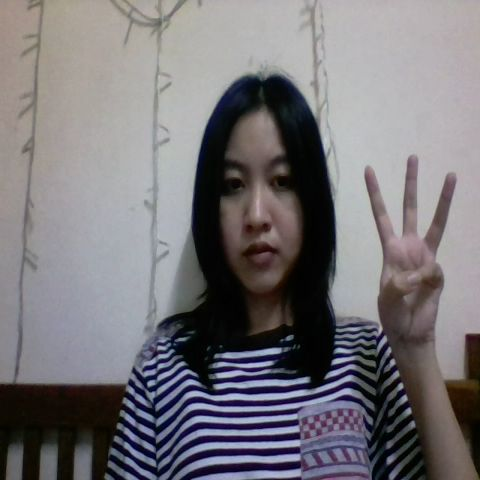

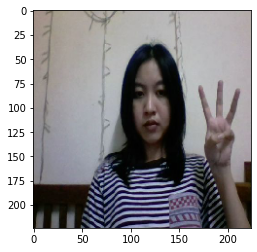

(1, 224, 224, 3)
Predicted class is: six


In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


img = image.load_img(filename, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)


# predicting images
labels = ['zero','one','two','three','four','five','six','seven','eight','nine']
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
#classes = model.predict_classes(images, batch_size=10)
predicted = model_ResNet_09_a_rmsprop.predict(images, batch_size=10)
print("Predicted class is:",labels[np.argmax(predicted,axis=1)[0]])

#Evaluation

##model_ResNet_09_wa_adam  [with out augment]

In [ ]:
y_pred = model_ResNet_09_wa_adam.predict(test_images).argmax(axis=1)

In [ ]:
score = model_ResNet_09_wa_adam.evaluate(train_images, train_labels)*100
print("Test loss:", score[0]); print("Test accuracy:", score[1])

23/23 [==============================] - 12s 503ms/step - loss: 0.4337 - accuracy: 0.9972
Test loss: 0.4336634874343872
Test accuracy: 0.9972222447395325


In [ ]:
score = model_ResNet_09_wa_adam.evaluate(val_images, val_labels)*100
print("Test loss:", score[0]); print("Test accuracy:", score[1])

8/8 [==============================] - 4s 509ms/step - loss: 1.3063 - accuracy: 0.5958
Test loss: 1.3062955141067505
Test accuracy: 0.5958333611488342


In [ ]:
score = model_ResNet_09_wa_adam.evaluate(test_images, test_labels)
print("Test loss:", score[0]); print("Test accuracy:", score[1])

5/5 [==============================] - 2s 449ms/step - loss: 0.4015 - accuracy: 0.9931
Test loss: 0.4014931917190552
Test accuracy: 0.9930555820465088


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(len(test_labels))

144


In [ ]:
print(classification_report(test_labels,y_pred))
print(confusion_matrix(test_labels,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        10
         3.0       1.00      1.00      1.00        15
         4.0       0.93      1.00      0.97        14
         5.0       1.00      1.00      1.00        12
         6.0       1.00      1.00      1.00        13
         7.0       1.00      0.93      0.96        14
         8.0       1.00      1.00      1.00        21
         9.0       1.00      1.00      1.00        14

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144

[[18  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0]
 [ 0  0  0

In [ ]:

confusion_matrix(test_labels,y_pred)

array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 14,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 12,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 13,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 14]])

In [ ]:
Labels = ['zero','one','two','three','four','five','six','saven','eight','nine']

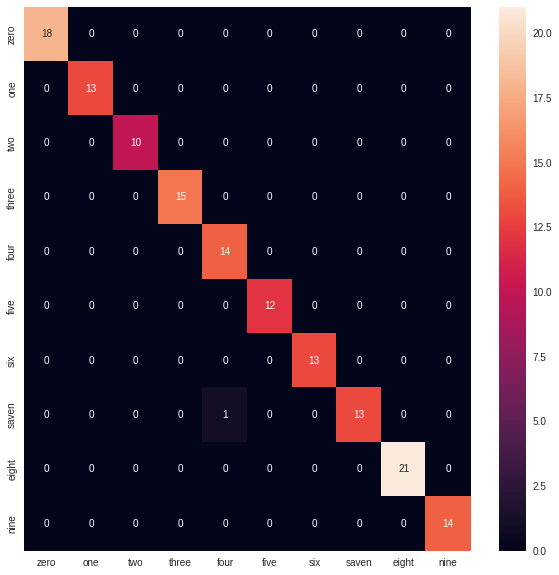

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(test_labels,y_pred)
df_cm = pd.DataFrame(array, index = [i for i in Labels ],
                    columns = [i for i in Labels ])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

##model_ResNet_09_a_rmsprop  [augment]

In [ ]:
y_pred = model_ResNet_09_a_rmsprop.predict(test_images).argmax(axis=1)

In [ ]:
score = model_ResNet_09_a_rmsprop.evaluate(train_images, train_labels)
print("Test loss:", score[0]); print("Test accuracy:", score[1])

235/235 [==============================] - 130s 548ms/step - loss: 0.0079 - accuracy: 1.0000
Test loss: 0.007898518815636635
Test accuracy: 1.0


In [ ]:
score = model_ResNet_09_a_rmsprop.evaluate(val_images, val_labels)
print("Test loss:", score[0]); print("Test accuracy:", score[1])

79/79 [==============================] - 43s 542ms/step - loss: 0.0873 - accuracy: 0.9764
Test loss: 0.08734829723834991
Test accuracy: 0.9764094352722168


In [ ]:
score = model_ResNet_09_a_rmsprop.evaluate(test_images, test_labels)
print("Test loss:", score[0]); print("Test accuracy:", score[1])

79/79 [==============================] - 41s 521ms/step - loss: 0.0895 - accuracy: 0.9796
Test loss: 0.08954517543315887
Test accuracy: 0.9796162843704224


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(len(test_labels))

2502


In [ ]:
print(classification_report(test_labels,y_pred))
print(confusion_matrix(test_labels,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       255
         1.0       1.00      0.99      0.99       261
         2.0       0.97      0.97      0.97       234
         3.0       1.00      1.00      1.00       259
         4.0       0.98      1.00      0.99       238
         5.0       1.00      0.99      1.00       256
         6.0       0.95      0.98      0.97       255
         7.0       0.97      0.92      0.94       247
         8.0       0.94      0.97      0.95       261
         9.0       1.00      0.98      0.99       236

    accuracy                           0.98      2502
   macro avg       0.98      0.98      0.98      2502
weighted avg       0.98      0.98      0.98      2502

[[255   0   0   0   0   0   0   0   0   0]
 [  1 258   2   0   0   0   0   0   0   0]
 [  0   1 228   0   0   0   2   1   2   0]
 [  0   0   1 258   0   0   0   0   0   0]
 [  0   0   0   0 237   0   1   0   0   0]
 [  0   0   1   0   1 254 

In [ ]:

confusion_matrix(test_labels,y_pred)

array([[255,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1, 258,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1, 228,   0,   0,   0,   2,   1,   2,   0],
       [  0,   0,   1, 258,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 237,   0,   1,   0,   0,   0],
       [  0,   0,   1,   0,   1, 254,   0,   0,   0,   0],
       [  0,   0,   2,   0,   0,   0, 251,   1,   1,   0],
       [  0,   0,   0,   0,   2,   0,   6, 227,  11,   1],
       [  1,   0,   0,   0,   0,   0,   2,   6, 252,   0],
       [  0,   0,   0,   0,   2,   0,   1,   0,   2, 231]])

In [ ]:
Labels = ['zero','one','two','three','four','five','six','saven','eight','nine']

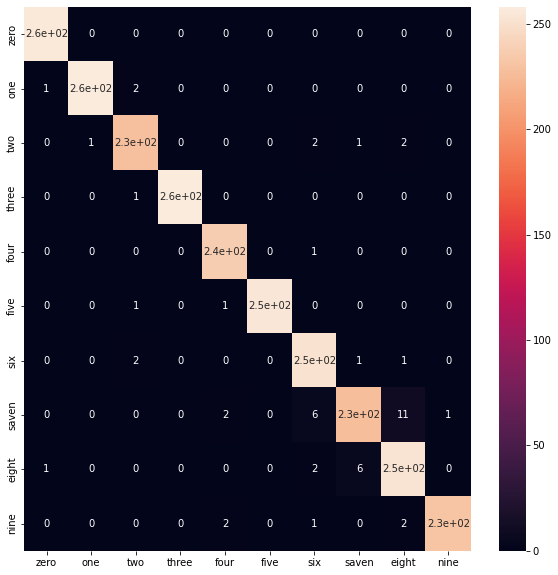

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(test_labels,y_pred)
df_cm = pd.DataFrame(array, index = [i for i in Labels ],
                    columns = [i for i in Labels ])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

##model_MobileNetV3_small_09_a_rmsprop [augment]

In [ ]:
y_pred = model_MobileNetV3_small_09_a_rmsprop.predict(test_images).argmax(axis=1)

In [ ]:
score = model_MobileNetV3_small_09_a_rmsprop.evaluate(train_images, train_labels)
print("Test loss:", score[0]); print("Test accuracy:", score[1])

235/235 [==============================] - 20s 83ms/step - loss: 0.0982 - accuracy: 0.9851
Test loss: 0.09818161278963089
Test accuracy: 0.9850746393203735


In [ ]:
score = model_MobileNetV3_small_09_a_rmsprop.evaluate(val_images, val_labels)
print("Test loss:", score[0]); print("Test accuracy:", score[1])

79/79 [==============================] - 6s 80ms/step - loss: 0.3735 - accuracy: 0.8589
Test loss: 0.37345919013023376
Test accuracy: 0.8588564395904541


In [ ]:
score = model_MobileNetV3_small_09_a_rmsprop.evaluate(test_images, test_labels)
print("Test loss:", score[0]); print("Test accuracy:", score[1])

79/79 [==============================] - 7s 83ms/step - loss: 0.3572 - accuracy: 0.8725
Test loss: 0.3572273552417755
Test accuracy: 0.8725019693374634


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(len(test_labels))

2502


In [ ]:
print(classification_report(test_labels,y_pred))
print(confusion_matrix(test_labels,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       255
         1.0       0.94      0.96      0.95       261
         2.0       0.89      0.89      0.89       234
         3.0       0.95      0.97      0.96       259
         4.0       0.83      0.90      0.86       238
         5.0       0.96      0.92      0.94       256
         6.0       0.83      0.81      0.82       255
         7.0       0.79      0.70      0.74       247
         8.0       0.74      0.73      0.73       261
         9.0       0.80      0.88      0.84       236

    accuracy                           0.87      2502
   macro avg       0.87      0.87      0.87      2502
weighted avg       0.87      0.87      0.87      2502

[[249   5   0   0   0   1   0   0   0   0]
 [  4 251   5   0   0   0   1   0   0   0]
 [  0   8 208   4   5   0   7   2   0   0]
 [  0   1   2 250   0   1   1   0   1   3]
 [  0   0   4   3 214   6   4   1   1   5]
 [  0   0   0   1  14 236 

In [ ]:

confusion_matrix(test_labels,y_pred)

array([[249,   5,   0,   0,   0,   1,   0,   0,   0,   0],
       [  4, 251,   5,   0,   0,   0,   1,   0,   0,   0],
       [  0,   8, 208,   4,   5,   0,   7,   2,   0,   0],
       [  0,   1,   2, 250,   0,   1,   1,   0,   1,   3],
       [  0,   0,   4,   3, 214,   6,   4,   1,   1,   5],
       [  0,   0,   0,   1,  14, 236,   1,   0,   0,   4],
       [  0,   1,  10,   0,  16,   0, 206,  16,   4,   2],
       [  0,   1,   4,   2,   3,   0,  19, 172,  43,   3],
       [  1,   0,   0,   2,   1,   0,   7,  25, 190,  35],
       [  0,   0,   0,   0,   4,   2,   1,   3,  19, 207]])

In [ ]:
Labels = ['zero','one','two','three','four','five','six','saven','eight','nine']

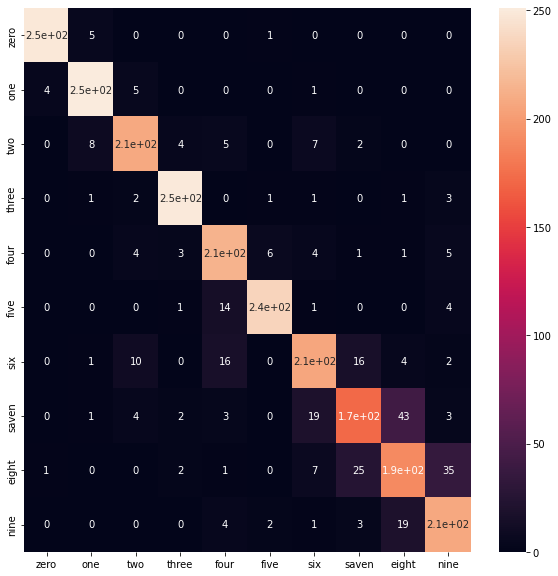

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(test_labels,y_pred)
df_cm = pd.DataFrame(array, index = [i for i in Labels ],
                    columns = [i for i in Labels ])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)